# TDS Project: Dataset Selection, EDA, and Basic Model Analysis
**Mahmud Hassan 208247825**

**Khalil Hamody 212923775**



In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles
sns.set_theme(style="whitegrid")
%matplotlib inline

In [63]:
# Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/TDS-CARS-MSRP/data.csv')

# Displaying the first few rows
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Check Dataset Information
Understand the structure, types of data, and missing values.

In [64]:
# Display basic information about the dataset
print(data.info())

# Summary statistics of numerical columns
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# **Observations:**
**Columns with Missing Values:**
1.   **Engine Fuel Type:** 3 missing values.
2.   **Engine HP:** 69 missing values.
3.   **Engine Cylinders:** 30 missing values.
4.   **Number of Doors:** 6 missing values.
5.   **Market Category:** 3742 missing values.

**Other Details:**
No missing values in critical columns like MSRP (target column), Make, or Model.


# **Handling Missing Values:**
**1. Engine Fuel Type:**

**Missing values:** 3

**Action:** Fill with the most frequent value (mode).

In [65]:
data['Engine Fuel Type'] = data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])


**2. Engine HP and Engine Cylinders:**

**Missing values:** 69 and 30

**Action:** Fill with the median value since these are numerical and likely skewed.

In [66]:
data['Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].median())
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())


**3. Number of Doors:**

**Missing values:** 6

**Action:** Fill with the median value

In [67]:
data['Number of Doors'] = data['Number of Doors'].fillna(data['Number of Doors'].median())


**4. Market Category:**

**Missing values:** 3742

**Action:** Since a large portion is missing, drop this column as it may not contribute significantly to prediction.

In [68]:
data.drop(columns=['Market Category'], inplace=True)


In [69]:
print(data.isnull().sum())


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


# **1. Histogram of MSRP**
**Purpose:** To understand the distribution of car prices in the dataset. This helps identify outliers, skewness, and overall price range.

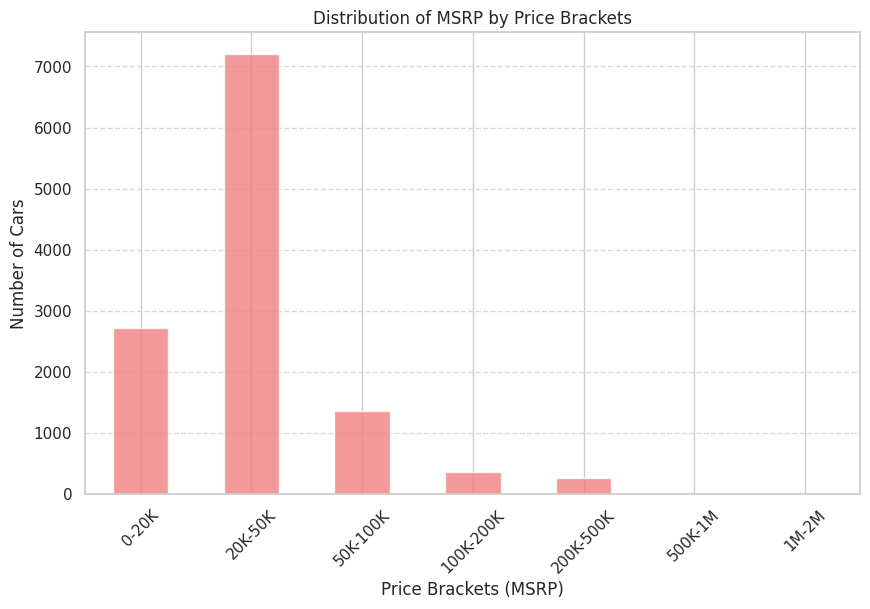

In [70]:
# Define custom bins for MSRP
bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000]
labels = ["0-20K", "20K-50K", "50K-100K", "100K-200K", "200K-500K", "500K-1M", "1M-2M"]

# Bin the data
data['Price Bracket'] = pd.cut(data['MSRP'], bins=bins, labels=labels)

# Count values per bin
price_bracket_counts = data['Price Bracket'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
price_bracket_counts.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title("Distribution of MSRP by Price Brackets")
plt.xlabel("Price Brackets (MSRP)")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **2. Boxplot of MSRP by Make**
**Purpose:**
To compare car prices across different manufacturers and observe the variability within each brand.

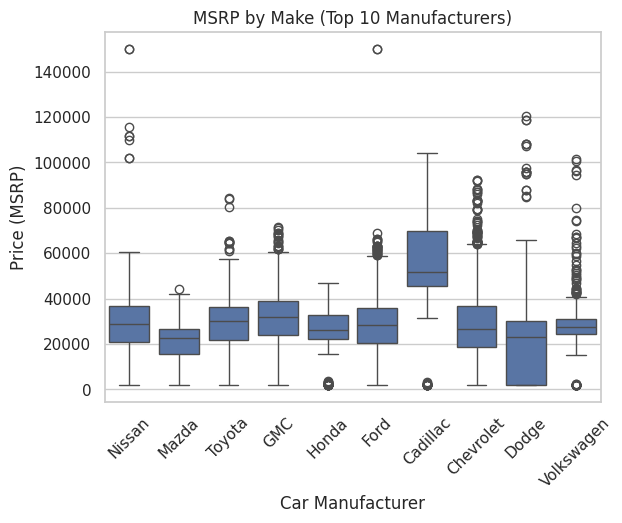

In [71]:
top_makes = data['Make'].value_counts().head(10).index  # Top 10 car manufacturers
sns.boxplot(x=data[data['Make'].isin(top_makes)]['Make'], y=data['MSRP'])
plt.title("MSRP by Make (Top 10 Manufacturers)")
plt.xlabel("Car Manufacturer")
plt.ylabel("Price (MSRP)")
plt.xticks(rotation=45)
plt.show()


# **3. Scatter Plot: MSRP vs. Engine HP**
**Purpose:**
To explore the relationship between a car's horsepower and its price.

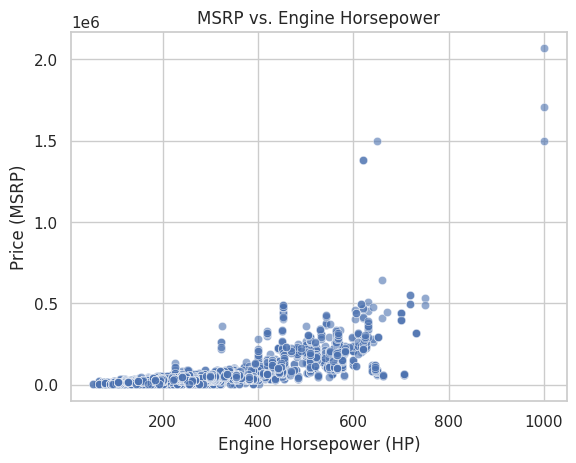

In [72]:
sns.scatterplot(x=data['Engine HP'], y=data['MSRP'], alpha=0.6)
plt.title("MSRP vs. Engine Horsepower")
plt.xlabel("Engine Horsepower (HP)")
plt.ylabel("Price (MSRP)")
plt.show()


# **4. Correlation Heatmap**
**Purpose:**
To identify correlations between numerical features and the target variable (MSRP).

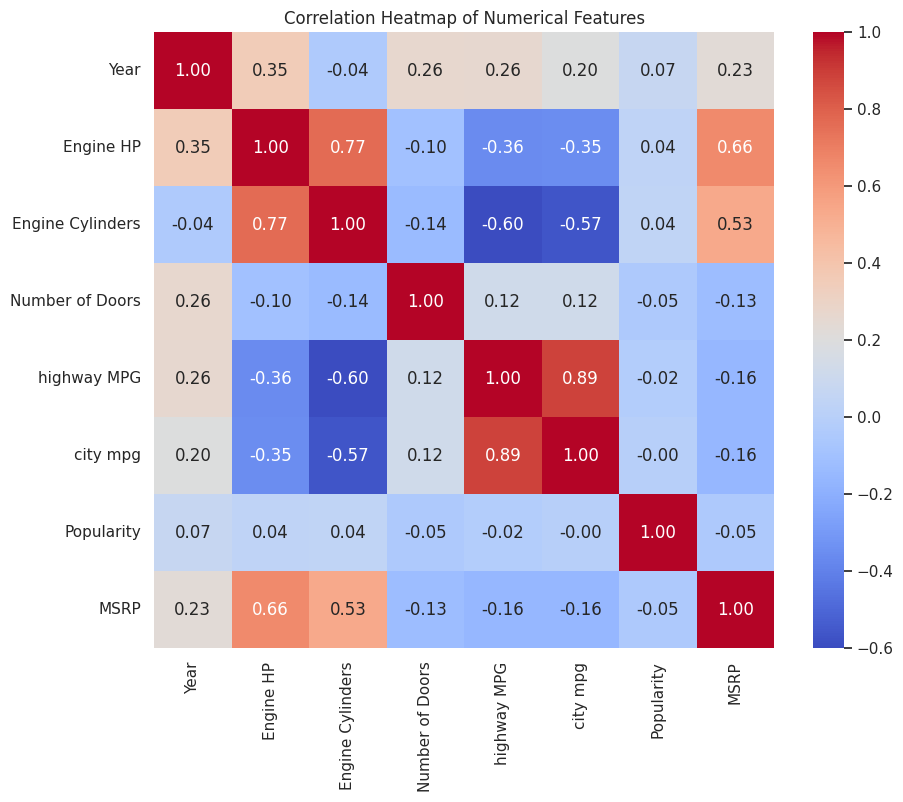

In [73]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# **5. Boxplot: MSRP by Vehicle Style**
**Purpose:**
To compare car prices based on their style (e.g., sedan, SUV, coupe).

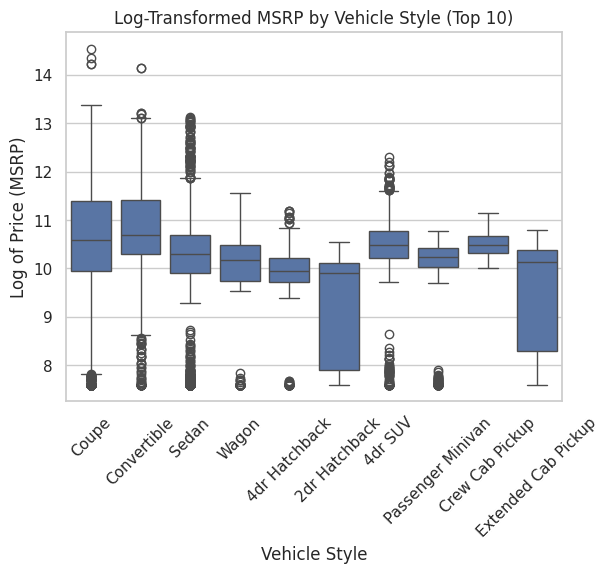

In [74]:
# Apply log transformation to MSRP
data['Log MSRP'] = np.log1p(data['MSRP'])

# Plot the boxplot with log-transformed MSRP
top_styles = data['Vehicle Style'].value_counts().head(10).index
sns.boxplot(x=data[data['Vehicle Style'].isin(top_styles)]['Vehicle Style'],
            y=data['Log MSRP'])
plt.title("Log-Transformed MSRP by Vehicle Style (Top 10)")
plt.xlabel("Vehicle Style")
plt.ylabel("Log of Price (MSRP)")
plt.xticks(rotation=45)
plt.show()


# **6. Boxplot: MSRP by Vehicle Size**
**Purpose:**
To show how car size impacts price, focusing on three categories (Compact, Midsize, Large).

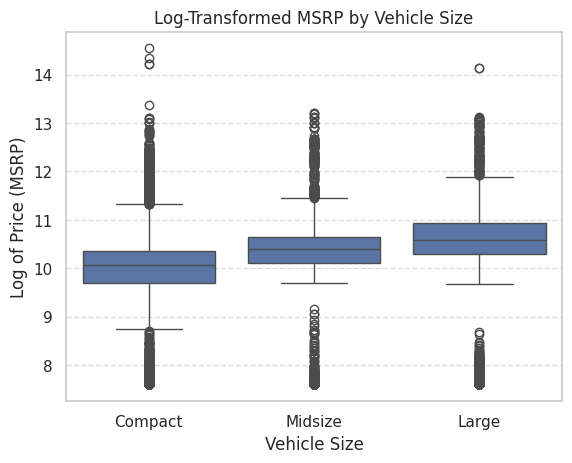

In [75]:
data['Log MSRP'] = np.log1p(data['MSRP'])

# Boxplot with log-transformed MSRP
sns.boxplot(x=data['Vehicle Size'], y=data['Log MSRP'])
plt.title("Log-Transformed MSRP by Vehicle Size")
plt.xlabel("Vehicle Size")
plt.ylabel("Log of Price (MSRP)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()